In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from nltk.tokenize import RegexpTokenizer
import scipy.sparse as sp
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import math


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
def cleanData1(user_rate,data):
  data = data.drop_duplicates(subset=['title_without_series'])
  data.reset_index(drop=True, inplace=True)

  book_rated = user_rate.drop_duplicates(subset=['book_id'])

  md_book = pd.merge(data, book_rated['book_id'], 
                   on='book_id', 
                   how='inner')
  md_book = md_book[md_book.notna()]
  book_list = md_book['book_id'].unique()
  user_rate = user_rate.loc[user_rate['book_id'].isin(book_list)]
  A = user_rate['user_id'].unique()
  user_dict = { value: index for index, value in enumerate(A)}
  user_rate['ids']=user_rate['user_id'].map(user_dict)
  user_rate['ids'] = user_rate['ids'].astype(int)
  return user_rate,md_book

def cleanData2(md_book):

  md_book['author'] = md_book['author'].str.replace(' ','')
  md_book['author'] = md_book['author'].str.lower()
  md_book['author'] = md_book['author'].str.replace(',',' ')
  md_book['author2'] = md_book['author'] + ' ' + md_book['author']

  md_book['genres'] = md_book['genres'].apply(remove_punctuation)
  md_book['genres'] = md_book['genres'].apply(lambda x: ' '.join(set(x.split())))
  md_book['soup'] = md_book['author2'].str.cat(md_book['genres'], sep=' ')
  return md_book
def cleanData3(user_rate_test,md_user,md_book):
  A = md_user['user_id'].unique()
  user_dict = { value: index for index, value in enumerate(A)}
  user_rate_test['ids']=user_rate_test['user_id'].map(user_dict)
  user_rate_test.dropna(subset=['ids'], inplace=True)
  user_rate_test['ids'] = user_rate_test['ids'].astype(int)
  print('1')

  return user_rate_test

In [5]:
user_rate = pd.read_csv("Data\userRate.csv")
data = pd.read_csv("Data\DATA_FINAL.csv")
user_rate_test = pd.read_csv("Data\test-1.csv")


#tập train
md_user,md_book = cleanData1(user_rate,data)

#tập test
md_user_test= cleanData3(user_rate_test,md_user,md_book)


user_arr = md_user.values[:,1]
rate_matrix = md_user.values



md_book = cleanData2(md_book)
book_arr = md_book.values[:,0]
md_user = md_user[md_user['book_id'].isin(book_arr)]
user_rate_test = user_rate_test[user_rate_test['book_id'].isin(book_arr)]

<ipython-input-4-92170475e088>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rate['ids']=user_rate['user_id'].map(user_dict)
<ipython-input-4-92170475e088>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rate['ids'] = user_rate['ids'].astype(int)


1


In [25]:
# md_book['genres']
word_dict = {}

for index, row in md_book.iterrows():
    words = row['genres'].split()  # Tách các từ trong trường A
    for word in words:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1

print(word_dict)

{'thriller': 5980, 'children': 3209, 'fiction': 20715, 'crime': 5980, 'paranormal': 6611, 'romance': 4931, 'adult': 4323, 'fantasy': 6611, 'young': 4323, 'mystery': 5980, 'historical': 10728, 'history': 10728, 'biography': 10728, 'graphic': 2634, 'comics': 2634, 'poetry': 1625}


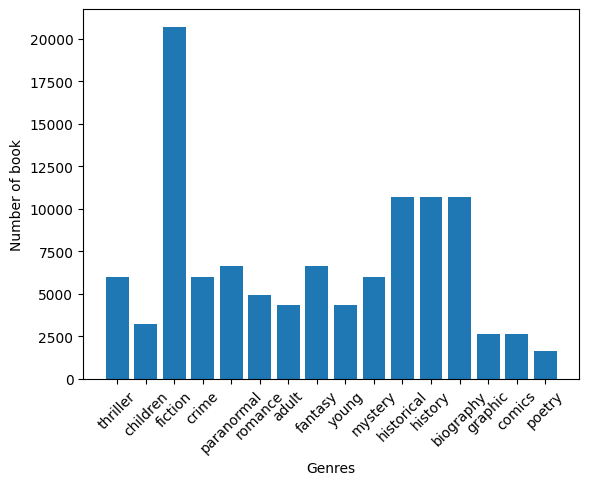

In [41]:
words = list(word_dict.keys())
counts = list(word_dict.values())

# Vẽ biểu đồ cột
plt.bar(words, counts)

# Đặt tên cho trục x và trục y
plt.xlabel('Genres')
plt.ylabel('Number of book')
plt.xticks(rotation=45)

# Điều chỉnh khoảng cách giữa các cột
plt.subplots_adjust(wspace=0.5)  # Thay đổi giá trị wspace để tăng khoảng cách

# Hiển thị biểu đồ
plt.show()

In [42]:
md_user.to_csv('/content/drive/MyDrive/ML/md_user.csv', index=False)
user_rate_test.to_csv('/content/drive/MyDrive/ML/user_rate_test.csv', index=False)
md_book.to_csv('/content/drive/MyDrive/ML/md_book.csv', index=False)